In [ ]:
from IPython.display import display, HTML
display(HTML(
"""
<a target="_blank" href="https://colab.research.google.com/github/facebookresearch/segment-anything/blob/main/notebooks/automatic_mask_generator_example.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>
"""
))

import torch
import torchvision
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())
import sys
!{sys.executable} -m pip install opencv-python matplotlib
!{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'

!mkdir images
!wget -P images https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/dog.jpg

!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth


PyTorch version: 2.0.0+cu118
Torchvision version: 0.15.1+cu118
CUDA is available: True
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-mbedrgns
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-mbedrgns
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36589 sha256=b9afe700a86ffbf2d7147f5775291af6860178f6ebd7a3cddbcaae66b718e241
  Stored in directory: /tmp/pip-ephem-wheel-cache-rwecj5vo/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segm

# Import

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [ ]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)


# Load photo

In [ ]:
image = cv2.imread('/content/train_0004.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Set parameters and mask

In [ ]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)

In [ ]:
ppp = [1, 16, 64]
pit = [.1, .5, .9]
sct = [.1, .5, .9]
cnl = [0]
cnpdf = [1, 4]
mmra = [10, 1000]

list_of_comb = []

for i in ppp:
     for j in pit:
          for ii in sct:
              for jj in cnl:
                  for ij in cnpdf:
                      for ji in mmra:
                          temp = []
                          temp.append(i)
                          temp.append(j)
                          temp.append(ii)
                          temp.append(jj)
                          temp.append(ij)
                          temp.append(ji)
                          list_of_comb.append(temp)

In [ ]:
import os
# Directory
directory = "new"
# Parent Directory path
parent_dir = "/content/"
# Path
path = os.path.join(parent_dir, directory)
# Create the directory
# 'GeeksForGeeks' in
# '/home / User / Documents'
os.mkdir(path)

In [ ]:
for i in range(len(list_of_comb)):
    mask_generator_2 = SamAutomaticMaskGenerator(
        model=sam,
        points_per_side=list_of_comb[i][0],
        pred_iou_thresh=list_of_comb[i][1],
        stability_score_thresh=list_of_comb[i][2],
        crop_n_layers=list_of_comb[i][3],
        crop_n_points_downscale_factor=list_of_comb[i][4],
        min_mask_region_area=list_of_comb[i][5],  # Requires open-cv to run post-processing
    )

    masks2 = mask_generator_2.generate(image)

    plt.figure(figsize=(20,20))
    plt.imshow(image)
    show_anns(masks2)
    plt.axis('off')
    plt.savefig(f'/content/new/{i}, {list_of_comb[i]}.png')


In [ ]:
!zip -r /content/file.zip /content/new


In [ ]:
from google.colab import files
files.download("/content/file.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

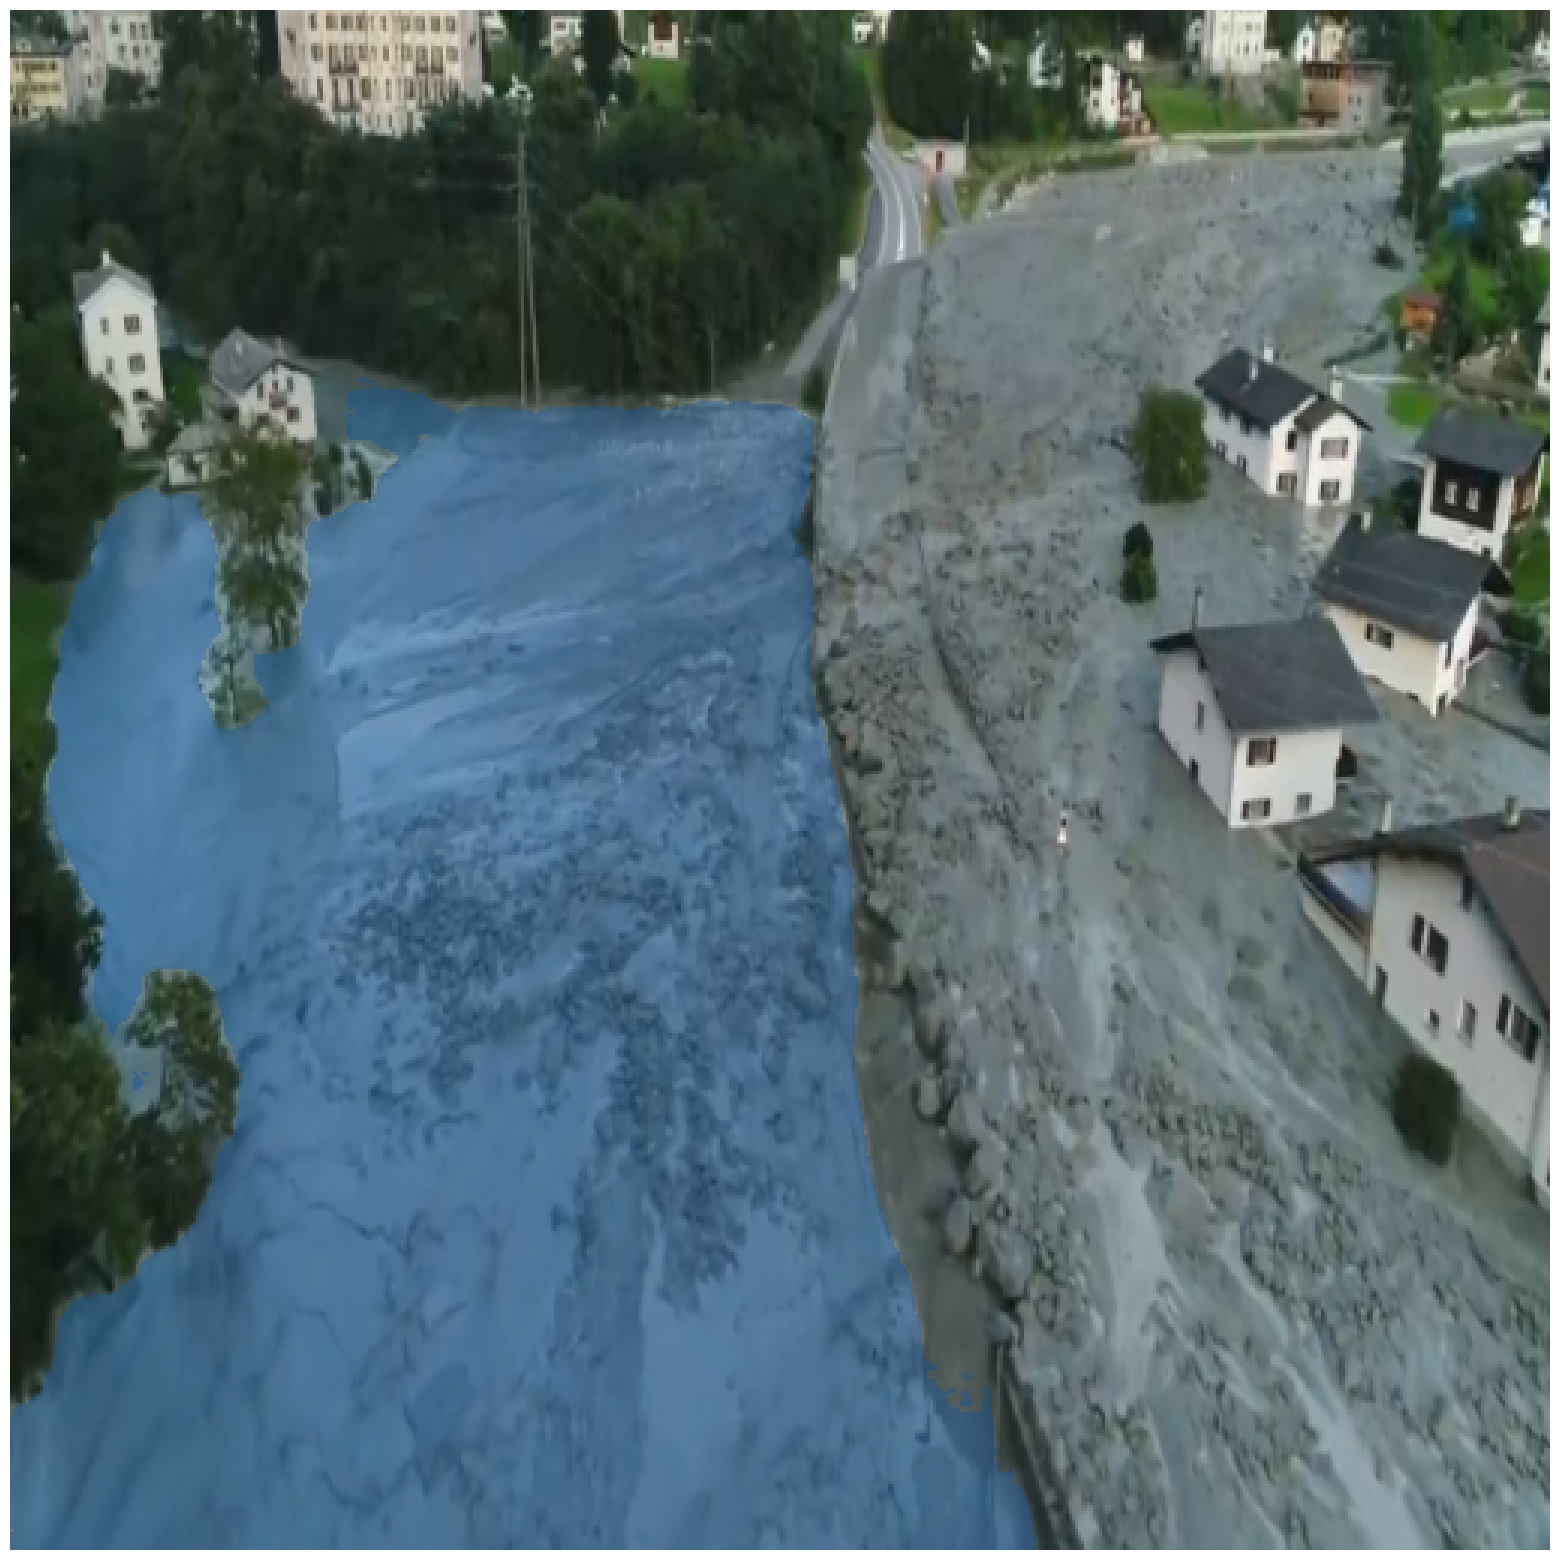

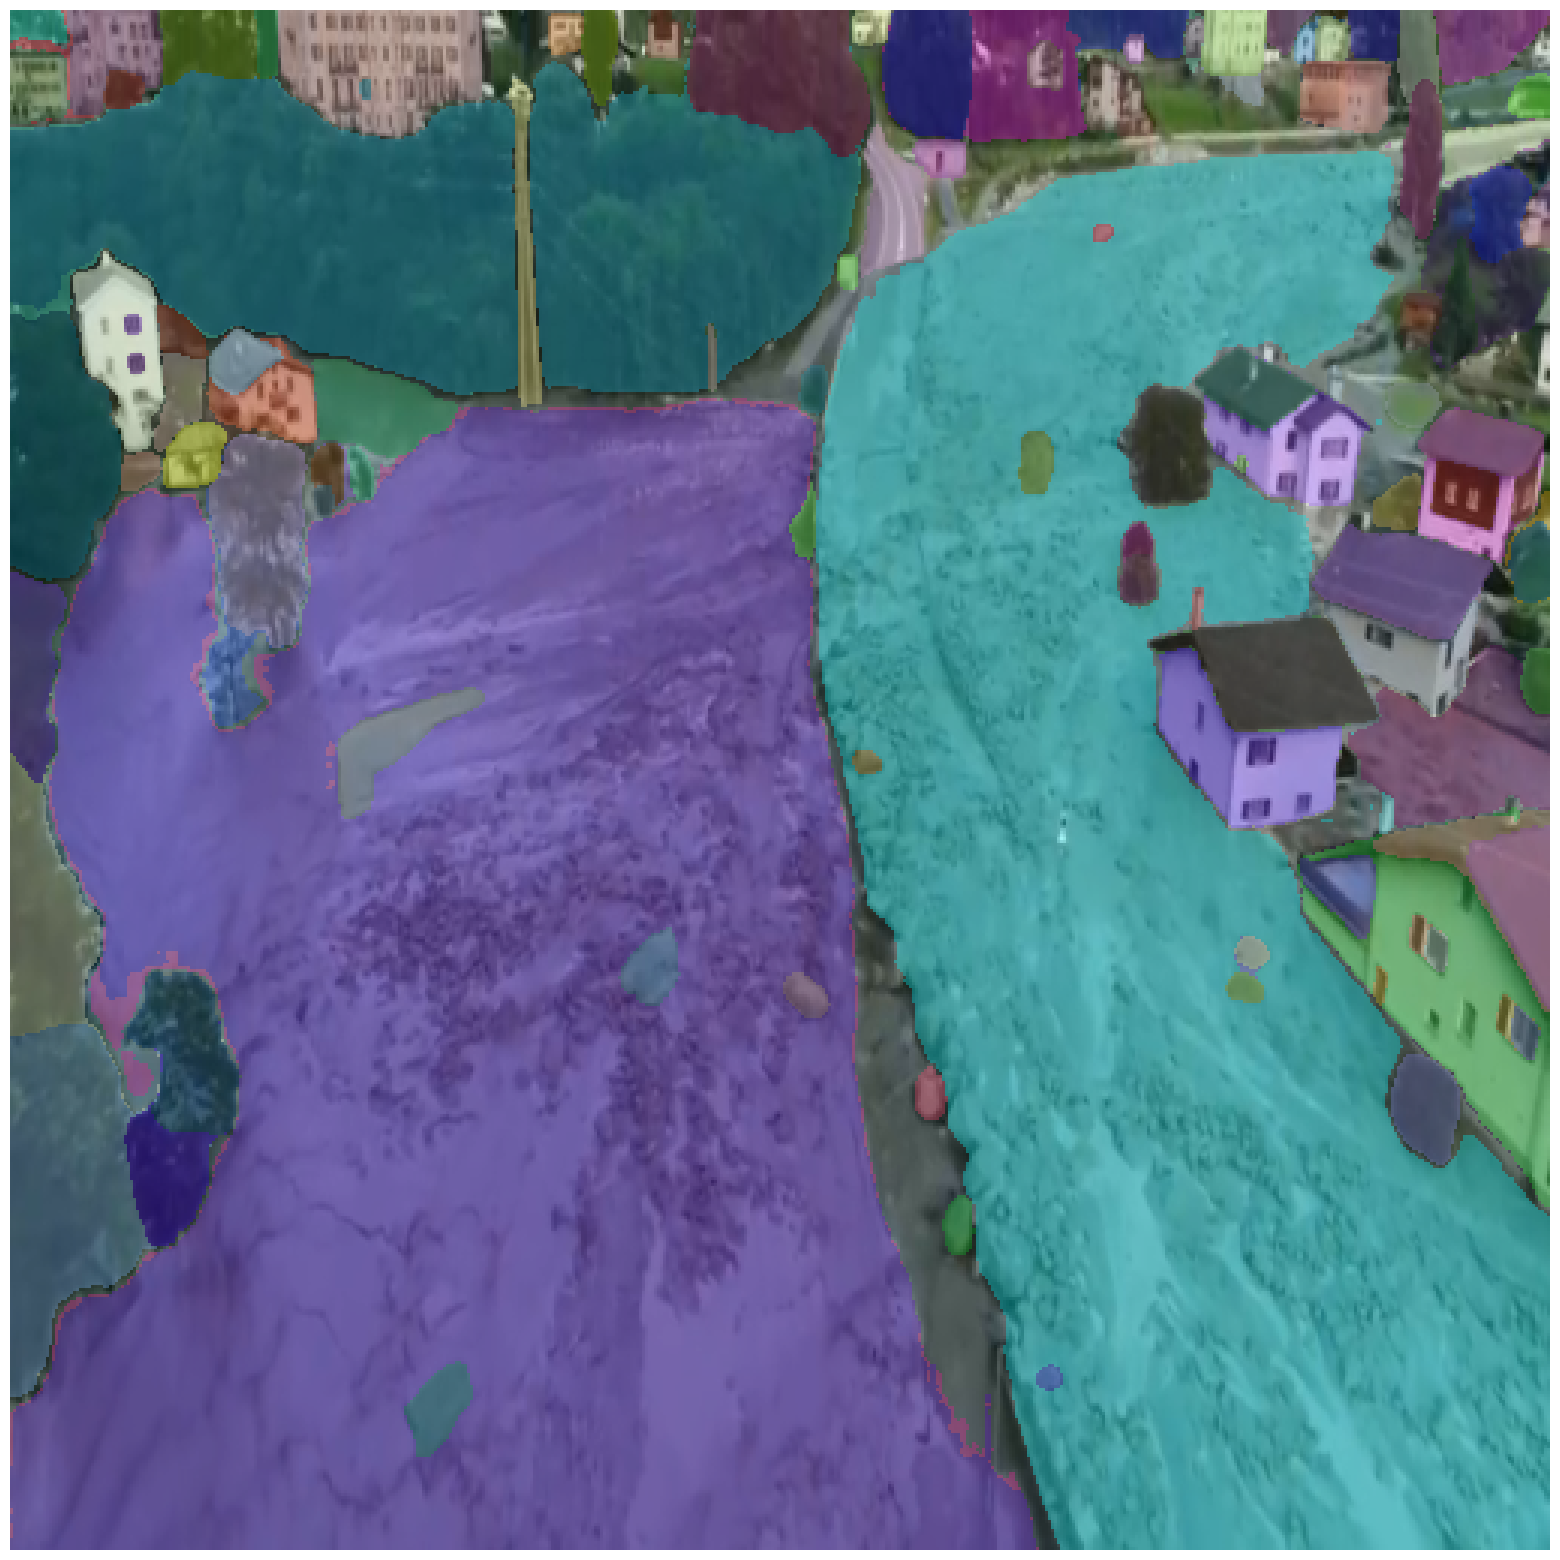

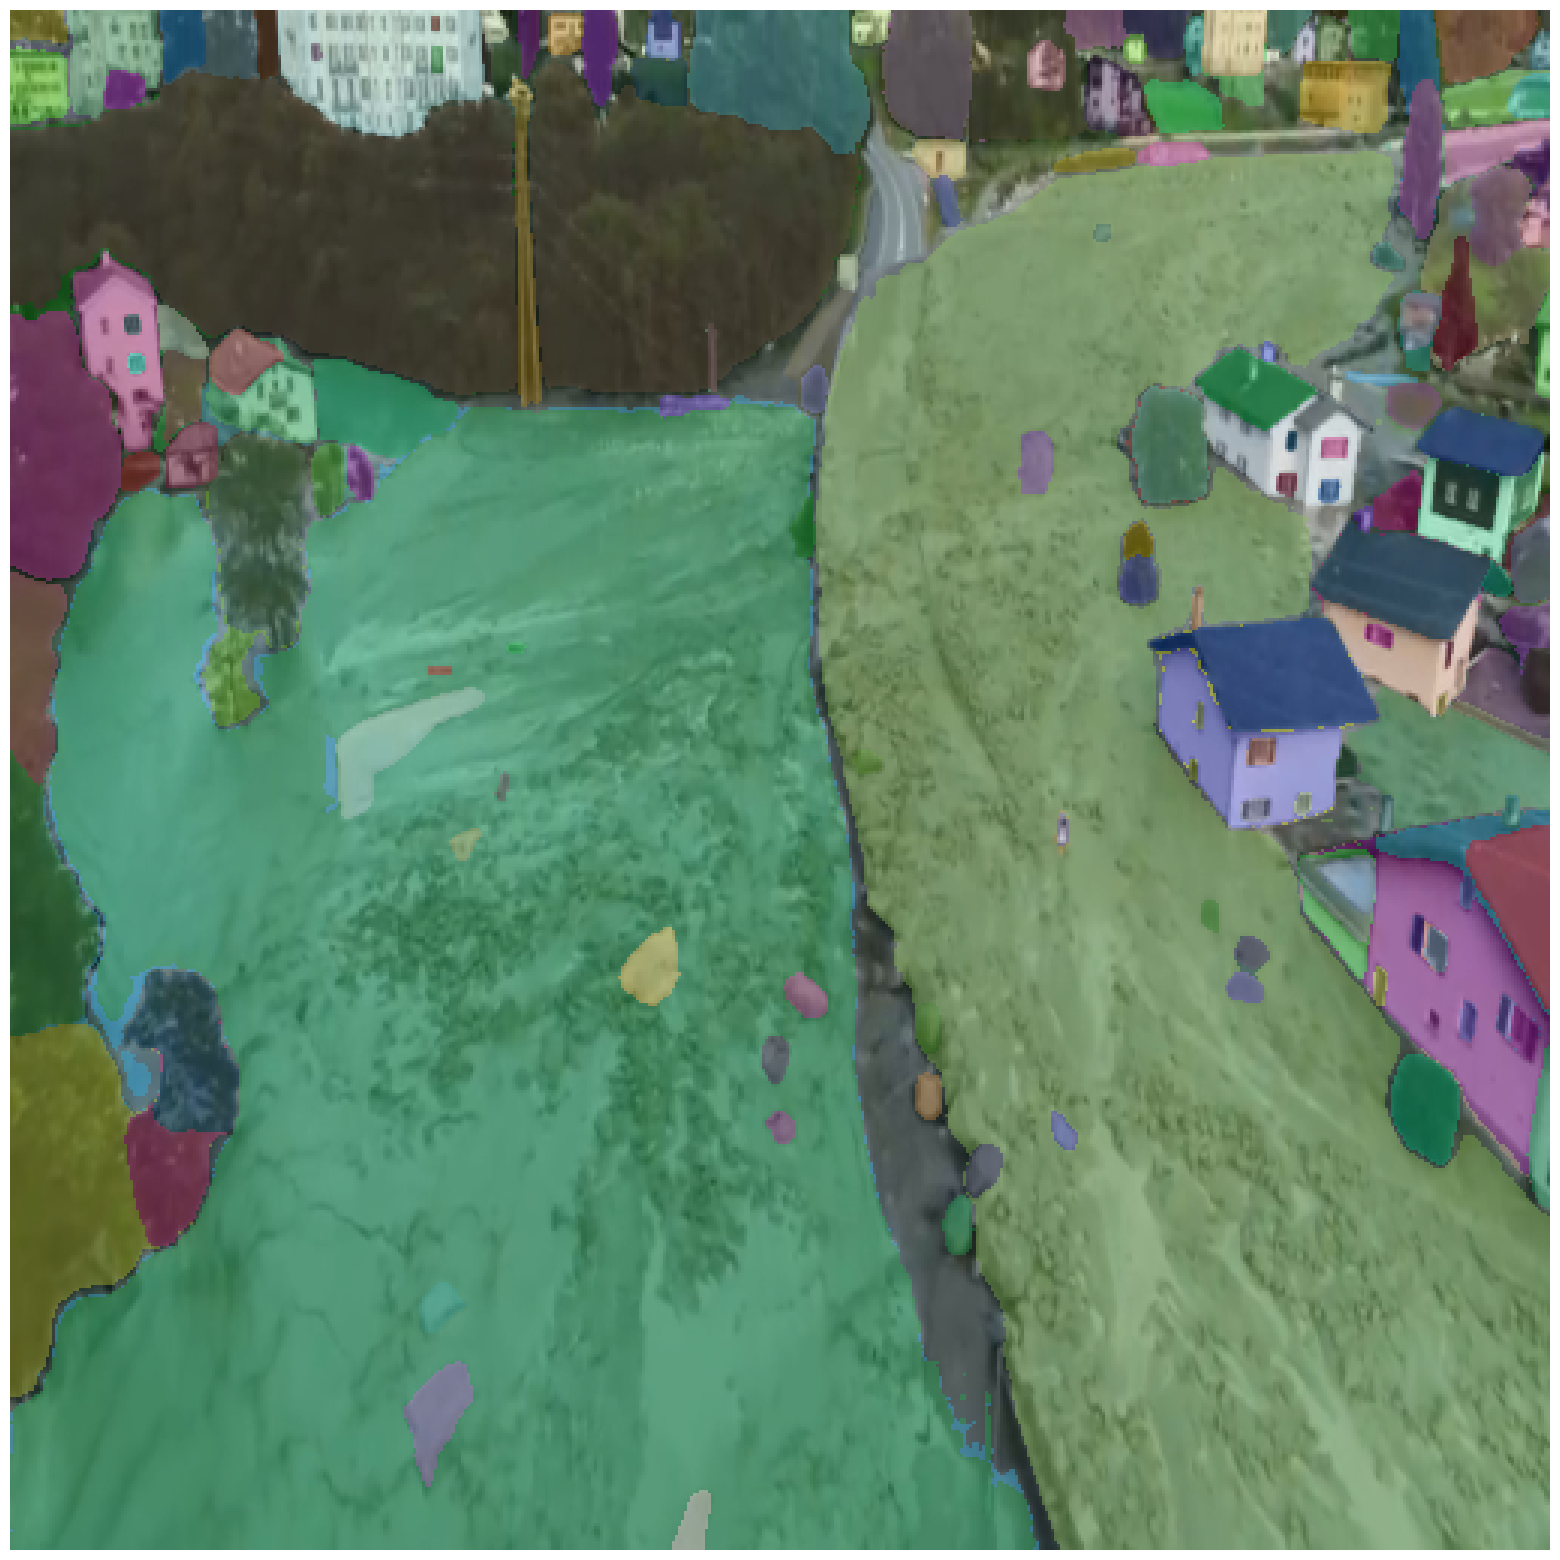

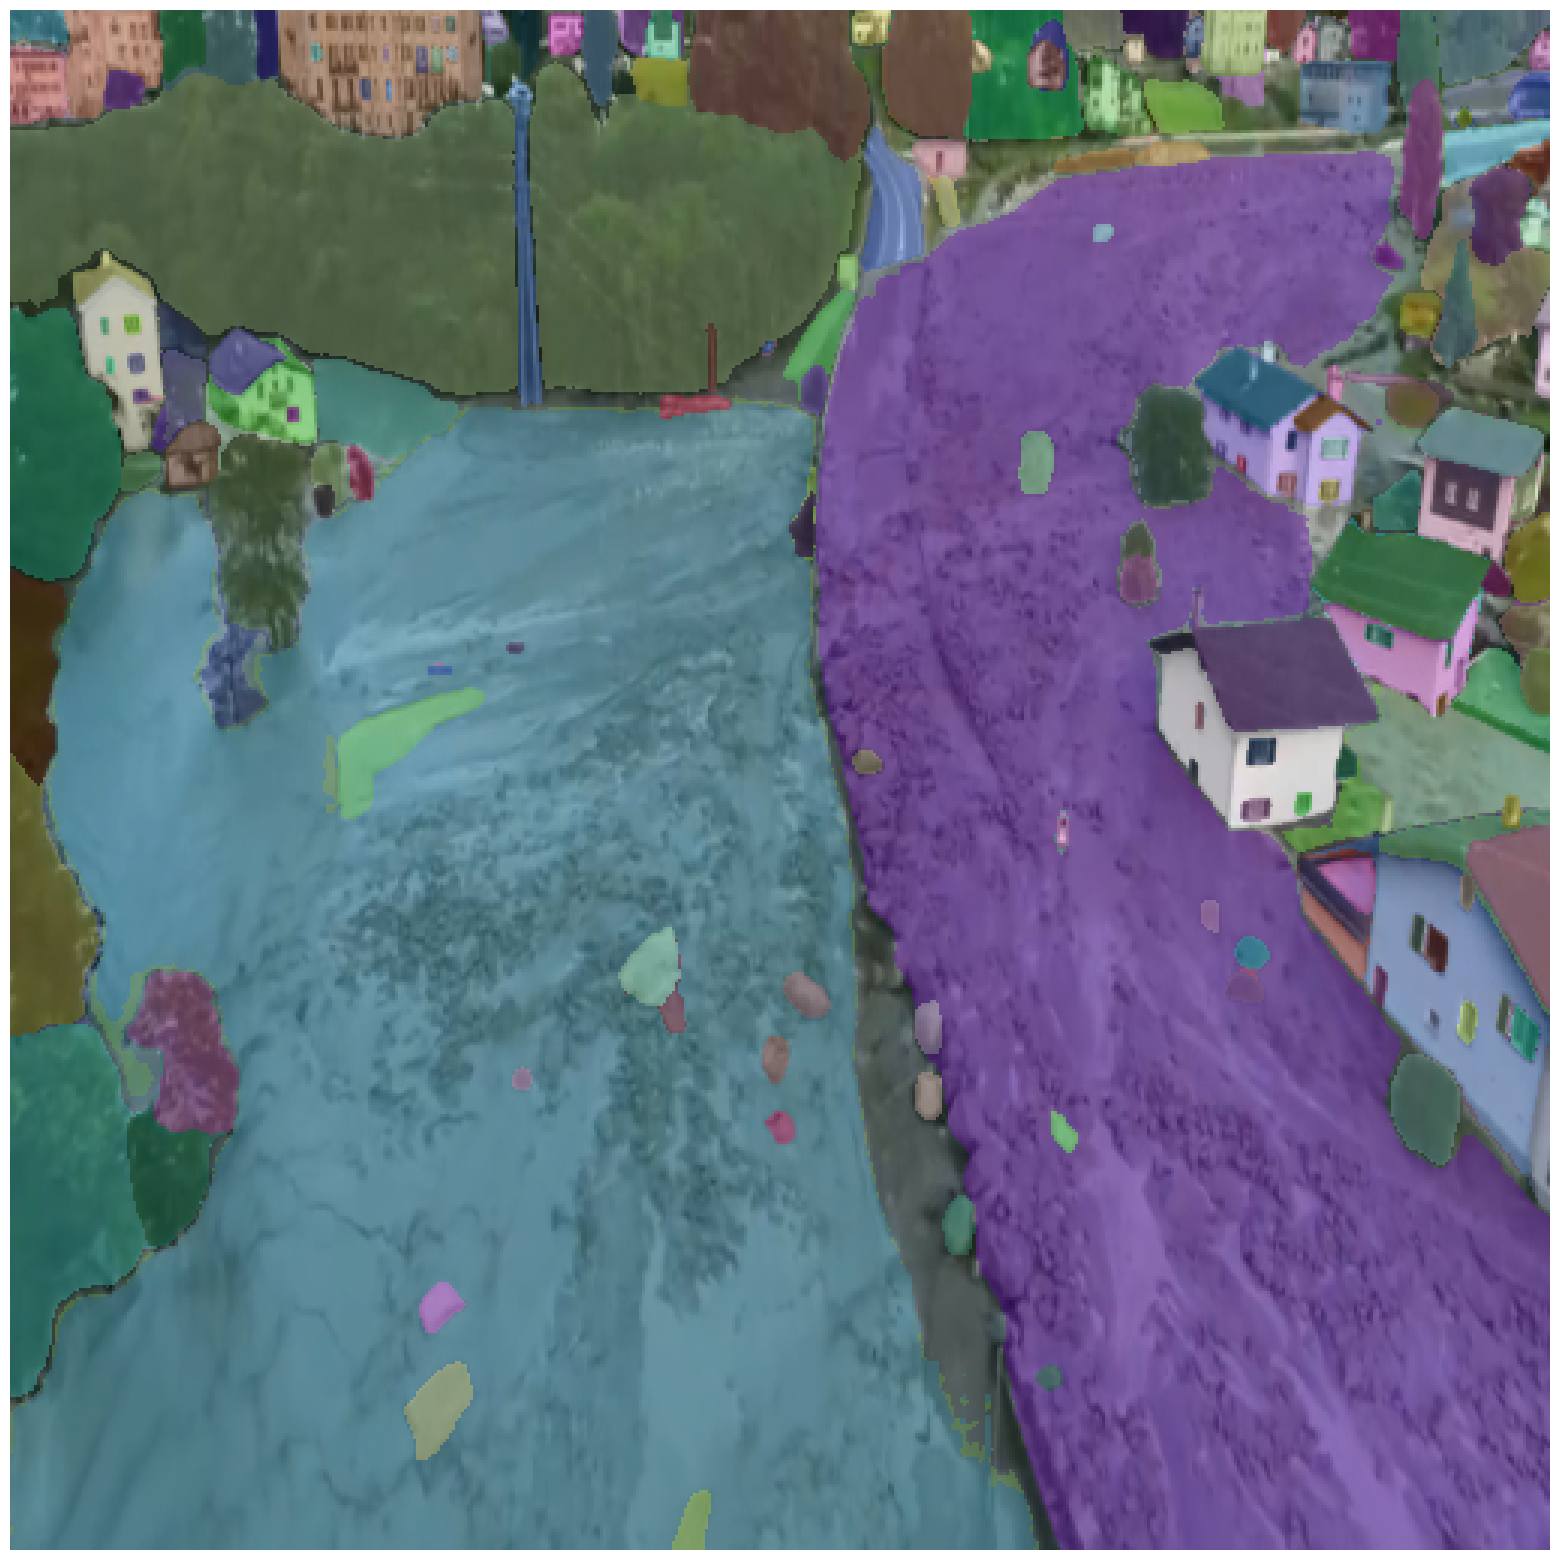

In [ ]:
mask_generator_2 = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side =1,
    points_per_batch = 64,
    pred_iou_thresh = 0.88,
    stability_score_thresh = 0.95,
    stability_score_offset = 1.0,
    box_nms_thresh = 0.7,
    crop_n_layers = 0,
    crop_nms_thresh = 0.7,
    crop_overlap_ratio = 512 / 1500,
    crop_n_points_downscale_factor = 1,
    point_grids = None,
    min_mask_region_area = 0
)

masks2 = mask_generator_2.generate(image)

plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks2)
plt.axis('off')
plt.show()

mask_generator_2 = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side =32,
    points_per_batch = 64,
    pred_iou_thresh = 0.88,
    stability_score_thresh = 0.95,
    stability_score_offset = 1.0,
    box_nms_thresh = 0.7,
    crop_n_layers = 0,
    crop_nms_thresh = 0.7,
    crop_overlap_ratio = 512 / 1500,
    crop_n_points_downscale_factor = 1,
    point_grids = None,
    min_mask_region_area = 0
)

masks2 = mask_generator_2.generate(image)

plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks2)
plt.axis('off')
plt.show()

mask_generator_2 = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side =64,
    points_per_batch = 64,
    pred_iou_thresh = 0.88,
    stability_score_thresh = 0.95,
    stability_score_offset = 1.0,
    box_nms_thresh = 0.7,
    crop_n_layers = 0,
    crop_nms_thresh = 0.7,
    crop_overlap_ratio = 512 / 1500,
    crop_n_points_downscale_factor = 1,
    point_grids = None,
    min_mask_region_area = 0
)

masks2 = mask_generator_2.generate(image)

plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks2)
plt.axis('off')
plt.show()

mask_generator_2 = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side =128,
    points_per_batch = 64,
    pred_iou_thresh = 0.88,
    stability_score_thresh = 0.95,
    stability_score_offset = 1.0,
    box_nms_thresh = 0.7,
    crop_n_layers = 0,
    crop_nms_thresh = 0.7,
    crop_overlap_ratio = 512 / 1500,
    crop_n_points_downscale_factor = 1,
    point_grids = None,
    min_mask_region_area = 0
)

masks2 = mask_generator_2.generate(image)

plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks2)
plt.axis('off')
plt.show()